Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Toyota_SimpleReg.csv', encoding= 'unicode_escape')
print('shape of data', data.shape)

shape of data (1436, 4)


In [3]:
data.head()

,Id,Model,Price,Age_06_15
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,57
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,57
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,58
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,60
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,64


In [4]:
data.tail()

,Id,Model,Price,Age_06_15
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,103
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,106
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,105
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,104
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,110


let's rename the column 'Age_06_15' to just 'Age'

In [5]:
data.rename(columns = {'Age_06_15' : 'Age'}, inplace=True)
list(data.columns)

['Id', 'Model', 'Price', 'Age']

let's drop Id and Model columns

In [6]:
col_drop = ['Id', 'Model']
for item in col_drop:
    del data[item]

list(data.columns)


['Price', 'Age']

check for NA values

In [7]:
data.isnull().sum()

Price    0
Age      0
dtype: int64

move column 'Price' to last for simplicity

In [8]:
data = data[['Age', 'Price']]
list(data.columns)

['Age', 'Price']

plot x vs y to understand the relation

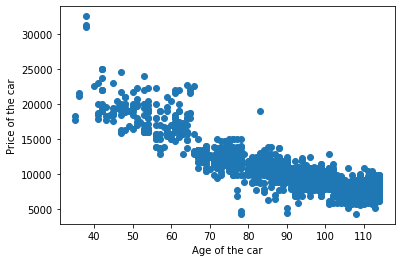

In [9]:
x1 = data['Age']
y = data['Price']
plt.scatter(x1, y)
plt.xlabel('Age of the car')
plt.ylabel('Price of the car')
plt.show()

###### fit a model using StatModel's OLS (ordinary least squares)

In [10]:
model1 = sm.OLS(y,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              4509.
Date:                Sun, 29 Mar 2020   Prob (F-statistic):                        0.00
Time:                        20:07:05   Log-Likelihood:                         -14422.
No. Observations:                1436   AIC:                                  2.885e+04
Df Residuals:                    1435   BIC:                                  2.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age          107.4076      1.600     67.149      0.000     104.270     110.545
==============================================================================
Omnibus:                      341.066   Durbin-Watson:                   0.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              676.694
Skew:                           1.395   Prob(JB):                    1.14e-147
Kurtosis:                       4.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Evaluation

### 1. The robustness of the model needs to be evaluated.

H0 and Ha need to be defined. They are defined as follows:<br><br>
H0 (NULL hypothesis): There is no relationship between x and y i.e. there is no relationship between age and price of the car.<br><br>
Ha (Alternate hypothesis): There is some relationship between x and y i.e. there is a relationship between age and price of the car.<br><br>
β1: The value of β1 determines the relationship between price and age. If β1 = 0 then there is no relationship. In this case, β1 is positive. It implies that there is some relationship between price and age of the car.<br><br>
t-stat: The t-stat value is how many standard deviations the coefficient estimate (β1) is far away from zero. Further, it is away from zero stronger the relationship between price and age of the car. The coefficient is significant. In this case, t-stat is 67.149. It is far enough from zero.<br><br>
p-value: p-value is a probability value. It indicates the chance of seeing the given t-statistics, under the assumption that NULL hypothesis is true. If the p-value is small e.g. < 0.0001, it implies that the probability that this is by chance and there is no relation is very low. In this case, the p-value is very very small (zero). It means that relationship between price and age is not by chance.<br><br>
With these metrics, we can safely reject the NULL hypothesis and fail to reject the alternate hypothesis. There is a robust relationship between price and engine size<br><br>
Therefore, the relationship is established.

## 2. The accuracy of the model needs to be evaluated.

To get a feel for the accuracy of the model, a metric named R-squared or coefficient of determination is important.<br><br>
R-squared or Coefficient of determination: To understand these metrics, let us break it down into its component.<br><br>
$Rsquared=1-\frac{RSS}{TSS}$<br><br>
Error (e) is the difference between the actual y and the predicted y. The predicted y is denoted as ŷ. This error is evaluated for each observation. These errors are also called as residuals.
Then all the residual values are squared and added. This term is called as Residual Sum of Squares (RSS). Lower the RSS, the better it is.<br><br>
There is another part of the equation of R-squared. To get the other part, first, the mean value of the actual target is computed i.e. average value of the price of the car is estimated. Then the differences between the mean value and actual values are calculated. These differences are then squared and added. It is the total sum of squares (TSS).<br><br>
R-squared a.k.a coefficient of determination is computed as 1- RSS/TSS. This metric explains the fraction of the variance between the values predicted by the model and the value as opposed to the mean of the actual. This value is between 0 and 1. The higher it is, the better the model can explain the variance.<br><br>
Adjusted r-squared value is 0.758 so our model is not really bad but also not the best.
The R-squared for the training set is 0.758 i.e. 75.8%. It means that the model can explain more than 75% of the variation.

In [11]:
# let's see if an intercept in the model will make a difference
x = sm.add_constant(x1)
model2 = sm.OLS(y, x).fit()
model2.summary()

# adjusted r-squared value is 0.768 so our new is an improvement over the last one
# p-value of constant variable is < 0.05 hence it is good to be in model
# probability of f-stat is < 0.05. Hence there is evidence that there's good amount of linear relationship between 
# target and independent variable

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sun, 29 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:07:05   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.611e+04    227.608    114.696      0.000    2.57e+04    2.66e+04
Age         -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

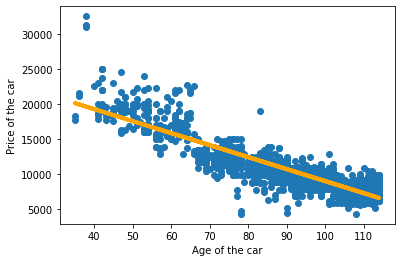

In [12]:
# Model visualization using model2 metrics
plt.scatter(x1, y)
y_hat = 26110 - (x1*170.9336)
fig = plt.plot(x1, y_hat, lw=4, c='orange', label='RegressionLine')
plt.xlabel('Age of the car')
plt.ylabel('Price of the car')
plt.show()

$$Linear Equation:$$<br> 
$$price=26110 - 170.9336(age)$$

###### fit a model using SK-Learn's LinearRegression

In [13]:
# Bonus: Let us build a model using sci-kit learn's LinearRegression
X = x1.values.reshape(-1,1)
Y = y.values.reshape(-1,1)
sk_learn_model = LinearRegression()
sk_learn_model.fit(X, Y)
print(sk_learn_model.coef_)
print(sk_learn_model.intercept_)

[[-170.93358501]]
[26105.8005393]


It can be observed that co-eff and intercept values of sk-learn and OLS are almost identical. <br>
Granted this shouldn't be the only measure to compare two models, its a good indicator that they would perform <br>
Similar, nonetheless.

$$price=26105.88005393 - 170.93358501(age)$$